# Quick-Start Guide for Assignment 1

The assignment details can be found at the end of this notebook. 

To complete the assignment, continue writing your code within this notebook. Once you've finished, download the notebook as a _.pynb_ file and submit it via itsLearning.

Feel free to delete any cells you don't need.

In [1]:
#pip install yfinance --upgrade --no-cache-dir# https://pypi.org/project/yfinance
import pkg_resources
import subprocess, sys
import yfinance as yf
import pandas as pd
from pathlib import Path

In [2]:
# Let's define some useful constants
START = "2000-07-03"
END   = "2023-07-03"

TICKERS = ['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'AMD', 'ANSS', 'APH', 'AVIFY', 'BA', 'BCE',  
           'CDNS', 'CGNX', 'CHKP', 'CSCO', 'CSGP', 'CTSH', 'DASTY', 
           'DTEGY', 'ERIC', 'FDS', 'FICO', 'GD', 'GE', 'GIB', 'GLW', 'HEI', 'HPQ', 'IBM', 'IFNNY', 
           'INFY', 'INTC', 'INTU', 'JKHY', 'KKPNY', 'KLAC', 'KYOCY', 'LHX', 'LMT', 'LOGI', 'LRCX', 'MCHP', 
           'MRVL', 'MSFT', 'MSI', 'MU', 'NICE', 'NOC', 'NOK', 'NTTYY', 'NVDA', 'ORAN', 'ORCL', 'OTEX', 
           'PAYX', 'PTC', 'QCOM', 'RCI', 'ROP', 'SAP', 'SCMWY', 'SFTBF', 'SKM', 'SNPS', 'STM', 'SWKS', 'T', 
           'TDY', 'TEF', 'TER', 'TLK', 'TRMB', 'TSM', 'TTDKY', 'TU', 'TXN', 'TYL', 'VIV', 'VOD', 
           'VRSN', 'VZ', 'WDC', 'ZBRA']

DATAFILE_NAME = "data.pickle"
# https://www.devdungeon.com/content/colorize-terminal-output-python
BOLD  = '\033[1m'
ULINE = '\033[4m'
BLUE  = '\033[34m'
RED   = '\033[31m'
RESET = '\033[0m'

# How many?
display(len(TICKERS))

84

In [3]:
# It's practical to download data from Yahoo!Finance just once and keep a local copy
if Path(DATAFILE_NAME).is_file(): # check if we got the datafile already
    data = pd.read_pickle(DATAFILE_NAME) # read it
else:
    data = yf.download(tickers=TICKERS, start=START, end=END, group_by='ticker', auto_adjust=True)
    #data.to_pickle(DATAFILE_NAME) # save localy

[*********************100%***********************]  84 of 84 completed


### View data in Pandas

In [4]:
data.info()
data.head(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5785 entries, 2000-07-03 00:00:00+00:00 to 2023-06-30 00:00:00+00:00
Columns: 420 entries, ('KKPNY', 'Open') to ('SWKS', 'Volume')
dtypes: float64(336), int64(84)
memory usage: 18.6 MB


Ticker                        KKPNY                                       \
Price                          Open      High       Low     Close Volume   
Date                                                                       
2000-07-03 00:00:00+00:00  8.585883  8.786137  8.548336  8.761106  33600   
2000-07-05 00:00:00+00:00  8.911295  9.023937  8.886263  8.961358  20300   

Ticker                          VIV                                        \
Price                          Open      High       Low     Close  Volume   
Date                                                                        
2000-07-03 00:00:00+00:00  2.730248  2.872873  2.730248  2.852498  270700   
2000-07-05 00:00:00+00:00  2.720060  2.740435  2.658935  2.699685  795800   

Ticker                     ...       ORCL                                   \
Price                      ...       Open       High        Low      Close   
Date                       ...                                               
2000-07-03 00:00:00+00:00  ...  32.914305  33.167882  32.001427  32.533939   
2000-07-05 00:00:00+00:00  ...  31.164632  31.494283  29.288161  29.338877   

Ticker                                    SWKS                        \
Price                        Volume       Open       High        Low   
Date                                                                   
2000-07-03 00:00:00+00:00  42136200  37.236070  37.445850  36.082276   
2000-07-05 00:00:00+00:00  94634200  35.557814  35.662704  31.467092   

Ticker                                         
Price                          Close   Volume  
Date                                           
2000-07-03 00:00:00+00:00  36.606728   310900  
2000-07-05 00:00:00+00:00  32.830666  1322200  

[2 rows x 420 columns]

In [5]:
#display(data.tail(3))

In [6]:
# You can restrict what you see:
display(data.loc['2022-05-05':'2022-05-07', (['PTC', 'AAPL'], ['Close','Volume'])])

Ticker                            PTC                AAPL           
Price                           Close  Volume       Close     Volume
Date                                                                
2022-05-05 00:00:00+00:00  112.150002  897800  154.609833  130525300
2022-05-06 00:00:00+00:00  110.410004  702500  155.340652  116124600

In [7]:
# Yes, there is print() function as well.
print ('from', data.index.min()) 
print ('to', data.index.max())

from 2000-07-03 00:00:00+00:00
to 2023-06-30 00:00:00+00:00


In [8]:
# pick a date
date = pd.to_datetime('2019-05-20')
# variable date contains now an object of class Timestamp
print(f'type: {type(date).__name__} :: {date.day_name()}, {date.date()}')

type: Timestamp :: Monday, 2019-05-20


In [9]:
# Let's see how Apple closed at 20.5.2019
# Get the value in the row '2019-05-20' and the column ('AAPL', 'Close')
close_value = data.loc[date, ('AAPL', 'Close')]
print(f'{BOLD+BLUE}Close on {date.date()}:{RESET} {close_value:.4f}')
# on string formating see https://pyformat.info

Close on 2019-05-20: 44.1238


/tmp/ipykernel_395/2382914500.py:3: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  close_value = data.loc[date, ('AAPL', 'Close')]


/tmp/ipykernel_395/3564405713.py:7: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  show_value = data.loc[date, ('AAPL', 'Close')]


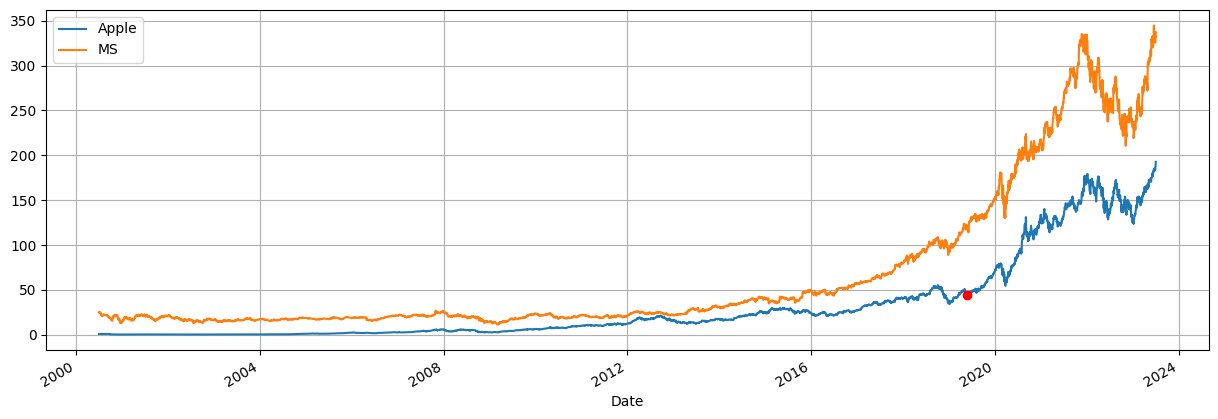

In [10]:
import matplotlib.pyplot as plt

# visualise a couple of time series and point out the value
series = [('AAPL','Close'), ('MSFT', 'Close')]
ax = data[series].plot(figsize=(15,5), grid=True)
ax.legend(['Apple', 'MS'])
show_value = data.loc[date, ('AAPL', 'Close')]
ax.plot([date], [show_value], marker='o', color='r')
# more on visualisetion with low-level control se https://matplotlib.org/users
# for making interactive plots se https://plotly.com/python/getting-started 
plt.show()

## Assignment
Now that you've read the Pandas documentation and have learned how to manipulate financial data, your task is to analyze the 84 downloaded stock datasets. 

Specifically, **identify the stock that experienced the largest single-day High-Low absolute price difference**.

- What is the name of the company?
- On what date did this occur?
- What was the *percentage difference* of this daily High-Low fluctuation?

In [11]:
data_High = data.xs('High', level=1, axis=1)
data_Low = data.xs('Low', level=1, axis=1)

In [12]:
Difference = pd.DataFrame(abs(data_High - data_Low))

In [13]:
# Find the maximum value in the entire DataFrame
max_value = Difference.max().max()

# Find the column containing the maximum value
column_name = Difference.max().idxmax()

# Find the row index containing the maximum value
row_index = Difference[column_name].idxmax()

# Output the results
print(f"Maximum Value: {max_value}")
print(f"Company Name: {column_name}")
print(f"Date: {row_index}")

Maximum Value: 71.27999877929688
Company Name: FICO
Date: 2022-01-28 00:00:00+00:00


In [14]:
Percentage_difference =  Difference.loc[row_index, column_name]/ data_Low.loc[row_index, column_name]
print(f"Percentage difference is: {Percentage_difference}")

Percentage difference is: 0.16743399082709218


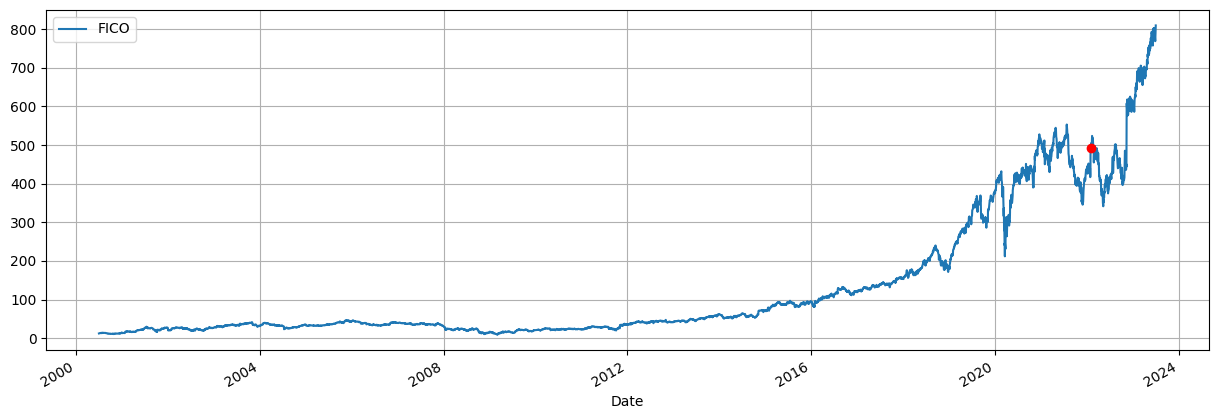

In [15]:
import matplotlib.pyplot as plt

# visualise a couple of time series and point out the value
series = [('FICO','Close')]
ax = data[series].plot(figsize=(15,5), grid=True)
ax.legend(['FICO'])
show_value = data.loc[row_index, ('FICO', 'Close')]
ax.plot([row_index], [show_value], marker='o', color='r')
plt.show()